In [2]:
import sys
import os
import pandas as pd
import gzip
import bz2
import numpy as np
import jax
import jax.numpy as jnp
import time
import pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

## Covtype: https://archive.ics.uci.edu/ml/datasets/covertype
(No Longer Used)

In [2]:
# covtype_path = "data/covtype.data.gz"

# covtype_np = np.loadtxt(covtype_path, delimiter=',')
# print(covtype_np.shape)

In [3]:
# covtype_feature = covtype_np[:,:-1]
# covtype_label = covtype_np[:,-1].reshape(-1,1).astype(int)
# covtype_label = covtype_label - 1

# print(covtype_feature.shape)
# print(covtype_label.shape)

In [4]:
# print(pd.DataFrame(np.unique(covtype_label, return_counts=True)).T)

In [5]:
# covtype_feature_train, covtype_feature_test, covtype_label_train, covtype_label_test = \
#     train_test_split(covtype_feature, covtype_label, random_state=4212)

In [6]:
# print(covtype_feature_train.shape)
# print(covtype_label_train.shape)
# print(covtype_feature_test.shape)
# print(covtype_label_test.shape)

In [7]:
# covtype_df = pd.DataFrame(covtype_feature)

# covtype_df.iloc[:,:10].describe()

In [8]:
# num_attribs = np.arange(0,10,1)
# cat_attribs = np.arange(10,54,1)

# full_pipeline = ColumnTransformer([
#         ("num", StandardScaler(), num_attribs),
#     ],remainder='passthrough')

# covtype_feature_train_norm = full_pipeline.fit_transform(covtype_feature_train)
# covtype_feature_test_norm = full_pipeline.transform(covtype_feature_test)
# print(covtype_feature_train_norm.shape)
# print(covtype_feature_test_norm.shape)

## IJCNN https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#ijcnn1

In [3]:
from sklearn.datasets import load_svmlight_file

filepath = 'data/ijcnn1.tr.bz2'
ijcnn_train_data, ijcnn_train_label = load_svmlight_file(filepath)
filepath = 'data/ijcnn1.t.bz2'
ijcnn_test_data, ijcnn_test_label = load_svmlight_file(filepath)

ijcnn_train_data = ijcnn_train_data.toarray()
ijcnn_test_data = ijcnn_test_data.toarray()

In [4]:
ijcnn_train_label = ijcnn_train_label.astype(int)
ijcnn_test_label = ijcnn_test_label.astype(int)
ijcnn_train_label = (ijcnn_train_label+1) // 2
ijcnn_test_label = (ijcnn_test_label+1) // 2

In [5]:
print(ijcnn_train_data.shape)
print(ijcnn_train_label.shape)
print(ijcnn_test_data.shape)
print(ijcnn_test_label.shape)

(35000, 22)
(35000,)
(91701, 22)
(91701,)


In [6]:
print(ijcnn_train_data.max())
print(ijcnn_train_data.min())
# Already Scaled

1.0
-0.930435


## MNIST: http://yann.lecun.com/exdb/mnist/

In [7]:
def training_images():
    with gzip.open('data/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def training_labels():
    with gzip.open('data/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels.reshape(-1,1)
    
def test_images():
    with gzip.open('data/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def test_labels():
    with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels.reshape(-1,1)

In [8]:
mnist_train_images = training_images()
mnist_train_labels = training_labels()
print(mnist_train_images.shape)
print(mnist_train_labels.shape)

(60000, 28, 28)
(60000, 1)


In [9]:
mnist_test_images = test_images()
mnist_test_labels = test_labels()
print(mnist_test_images.shape)
print(mnist_test_labels.shape)

(10000, 28, 28)
(10000, 1)


In [10]:
print(pd.DataFrame(np.unique(mnist_train_labels, return_counts=True)).T)

   0     1
0  0  5923
1  1  6742
2  2  5958
3  3  6131
4  4  5842
5  5  5421
6  6  5918
7  7  6265
8  8  5851
9  9  5949


In [11]:
print(np.max(mnist_train_images))
print(np.max(mnist_test_images))

255
255


In [12]:
mnist_train_images = mnist_train_images / 255.
mnist_test_images = mnist_test_images / 255.

## Adult: https://archive.ics.uci.edu/ml/datasets/adult

In [13]:
## Need further data cleaning & manipulating

adult_train = "data/adult.data"
adult_test = "data/adult.test"
adult_train_df = pd.read_csv(adult_train, header=None)
adult_test_df = pd.read_csv(adult_test, index_col=None)
adult_test_df = adult_test_df.reset_index()

In [14]:
adult_col_names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation','relationship','race','sex','capital-gain','capital-loss', 'hours-per-week','native-country', 'salary']
adult_train_df.columns = adult_col_names
adult_test_df.columns = adult_col_names

In [15]:
adult_feature_train = adult_train_df.iloc[:,:-1] 
adult_label_train = adult_train_df.iloc[:,-1]
adult_feature_test = adult_test_df.iloc[:,:-1]
adult_label_test = adult_test_df.iloc[:,-1]

In [16]:
print(adult_feature_train.shape)
print(adult_label_train.shape)
print(adult_feature_test.shape)
print(adult_label_test.shape)

(32561, 14)
(32561,)
(16281, 14)
(16281,)


In [17]:
adult_feature_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [18]:
print(pd.DataFrame(np.unique(adult_label_train, return_counts=True)).T)
print(pd.DataFrame(np.unique(adult_label_test, return_counts=True)).T)

        0      1
0   <=50K  24720
1    >50K   7841
         0      1
0   <=50K.  12435
1    >50K.   3846


In [19]:
adult_feature_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [20]:
num_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'int64']
cat_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'object']
print(num_attribs)
print(cat_attribs)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [21]:
num_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'int64']
cat_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'object']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

adult_feature_train_norm = full_pipeline.fit_transform(adult_feature_train)
adult_feature_train_norm = adult_feature_train_norm.toarray()
adult_feature_test_norm = full_pipeline.transform(adult_feature_test)
adult_feature_test_norm = adult_feature_test_norm.toarray()

print(adult_feature_train_norm.shape)
print(adult_feature_test_norm.shape)

(32561, 108)
(16281, 108)


In [22]:
n_train = adult_label_train.shape[0]
n_test = adult_label_test.shape[0]
adult_label_train_bi = np.zeros(n_train)
adult_label_test_bi = np.zeros(n_test)

adult_label_train_bi[adult_label_train == adult_label_train.unique()[1]] = 1
adult_label_test_bi[adult_label_test == adult_label_test.unique()[1]] = 1
adult_label_train_bi = adult_label_train_bi.astype(int)
adult_label_test_bi = adult_label_test_bi.astype(int)
print(pd.DataFrame(np.unique(adult_label_train_bi, return_counts=True)).T)
print(pd.DataFrame(np.unique(adult_label_test_bi, return_counts=True)).T)

   0      1
0  0  24720
1  1   7841
   0      1
0  0  12435
1  1   3846


# Utility Functions

## Common Utility

In [23]:
@jax.jit
def pred_proba(beta, x):
    """ predict the probability vector of x belonging to each class """
    scores = beta@x
    return jnp.exp(scores) / jnp.sum(jnp.exp(scores))

pred_proba_batch = jax.vmap(pred_proba, in_axes=(None, 0)) # Vectorize Predict Function

In [24]:
@jax.jit
def get_label(p):
    pred_label = jnp.argmax(p)
    return pred_label

def get_label_batch(P):
    labels = jax.vmap(get_label,in_axes=[0])(P)
    return labels.reshape(-1,1)
# get_label_batch = jax.vmap(get_label,in_axes=[0])

def get_accuracy(pred_labels, Y):
    """ Compare the predicted probability (p) with the ground truth labels (Y) to get the accuracy """
    return jnp.mean(Y==pred_labels)

def test_acc(beta,test_label, test_data):
    # Memory Problem
    N = test_label.shape[0]
    bs = 100
    
    running_acc=0
    n_mb=0
    
    for i in range(0,N,bs):
        mb_data = test_data[i:i+bs]
        mb_label = test_label[i:i+bs]
        
        mb_pred = pred_proba_batch(beta, mb_data)
        mb_pred_labels = get_label_batch(mb_pred)
        mb_acc = get_accuracy(mb_pred_labels, mb_label)
        
        running_acc += mb_acc
        n_mb += 1
    
    # test_acc = jnp.dot(running_acc, batch_sizes) / jnp.sum(batch_sizes)
    test_acc = running_acc / n_mb
        
    # test_pred = pred_proba_batch(beta, test_data)
    # test_acc = get_accuracy(test_pred, Y_true)
    return test_acc

## Graph Plotting

In [25]:
def record_graph(record_list, key='test_acc_epoch', title="Summary of Results", alpha=0.6, n = None):
    """
    Plot graph of records in the list
    
    Args:
     record_list: List of record (dictionary) as returned by model training functions
     key: Performance metric to be plotted
     n: Number of results to be plotted, full results will be plotted if None
     
    Output:
     Multiple lines of the record on the same graph
    """
    keys = record_list[0].keys()
    if key not in keys:
        print(f'{key} is an invalid key!')
        print(f'Please enter one of the following: {keys}')
        
    plt.figure(figsize=(16,10))
        
    for record in record_list:
        if n == None:
            n = len(record.get(key))
        y = record.get(key)[:n]
        x = np.arange(n)

        labels = record.get('name')
        # if 'var' in key:
        #     labels = ["grad_" + str(i) for i in range(y[0].shape[0])]
            
        plt.plot(x,
                 y, 
                 "-.",
                 alpha=alpha,
                 label=labels)
        plt.xticks(range(n))
    
    plt.legend()
    plt.xlabel(f'{key}'.split('_')[-1])
    plt.ylabel(' '.join(f'{key}'.split('_')[:-1]))
    plt.grid(True)
    plt.title(title)

## Multi-Class Logistic Regression

In [26]:
# Multi-Class Logistic Regression Loss
@jax.jit
def loss_single(beta, x, y):
    """
     Loss of a single data in multi-class Logistic Regression
    input:
     beta: Model parameters of shape [n, p], n = number of classes for label, p = dimension of features
     x: feature variables of shape p
     y: label, a single number indicating which class the data belongs to 
    """
    scores = beta@x
    scores = jnp.exp(scores) / jnp.sum(jnp.exp(scores)) # Softmax
    
    # scores = jax.nn.softmax(scores) # Softmax
    loss = -jnp.log(scores[y]) # Negative Loglikelihood of True Class
    return loss
    
loss_batch = jax.vmap(loss_single,in_axes=[None, 0, 0]) # Vectorize

def loss_LR(beta, X, Y):
    return jnp.mean(loss_batch(beta, X, Y))

def loss_LR_single(beta, x, y):
    loss = loss_single(beta, x, y)
    if loss.shape == ():
        return loss
    return loss[0]

In [27]:
# compute derivates
loss_LR_grad = jax.jit(jax.grad(loss_LR, argnums=0))
loss_LR_values_and_grad = jax.jit(jax.value_and_grad(loss_LR, argnums=0))

loss_LR_single_grad = jax.jit(jax.grad(loss_LR_single, argnums=0))
loss_LR_single_values_and_grad = jax.jit(jax.value_and_grad(loss_LR_single, argnums=0))

### Testing Grad Var Calculation

In [34]:
sum_grad_norm = jnp.zeros(7)
sum_grad_norm_2 = jnp.zeros(7)

In [35]:
print(sum_grad_norm_2)
print(sum_grad_norm)

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]


In [36]:
n_features = 54
n_classes = 7
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

_, grad1 = loss_LR_values_and_grad(beta_init, covtype_feature_train_norm[:1000], covtype_label_train[:1000])
_, grad2 = loss_LR_values_and_grad(beta_init, covtype_feature_train_norm[1000:2000], covtype_label_train[1000:2000])
print(grad1.shape)
print(grad2.shape)

NameError: name 'covtype_feature_train_norm' is not defined

In [37]:
jnp.linalg.norm(grad1,axis=None)

NameError: name 'grad1' is not defined

In [42]:
new_grad_norm = jnp.linalg.norm(grad1,axis=1)
sum_grad_norm_2 += new_grad_norm**2
sum_grad_norm += new_grad_norm
print(new_grad_norm)
print(sum_grad_norm_2)
print(sum_grad_norm)

[0.2910855  0.33604226 0.20581408 0.12155367 0.12237841 0.12196509
 0.14834969]
[0.08473077 0.1129244  0.04235943 0.0147753  0.01497648 0.01487548
 0.02200763]
[0.2910855  0.33604226 0.20581408 0.12155367 0.12237841 0.12196509
 0.14834969]


In [82]:
new_grad_norm = jnp.linalg.norm(grad2,axis=1)
sum_grad_norm_2 += new_grad_norm**2
sum_grad_norm += new_grad_norm
print(new_grad_norm)
print(sum_grad_norm_2)
print(sum_grad_norm)

[0.29765373 0.32411075 0.20028992 0.12812023 0.12245059 0.13217106
 0.12537302]
[0.17332852 0.21797217 0.08247548 0.03119009 0.02997062 0.03234467
 0.03772602]
[0.5887393  0.66015303 0.406104   0.2496739  0.244829   0.25413615
 0.2737227 ]


In [84]:
n_update = 2
new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
print(new_grad_var)

[1.07735395e-05 3.55839729e-05 7.62566924e-06 1.07800588e-05
 1.86264515e-09 2.60416418e-05 1.31981447e-04]


# SGD Algos

## 1. Basic SGD

To calculate variance of gradient estimates: https://stats.stackexchange.com/questions/244352/variance-of-gradient-as-e-g-in-sgd

In [32]:
def train_SGD_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD) with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_update', 'test_acc_update', 'grad_var_update'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    loss_history_per_pass = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):
        # randomize the batches
        idx = np.random.randint(0,N)

        X = train_data[idx]
        Y = train_label[idx]

        # compute the stochastic gradient
        grad = grad_fn(beta, X, Y)
        
        # loss = loss_LR_single(beta, X, Y)
        # loss_history_per_pass.append(loss)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SGD
        beta = beta - learning_rate*grad
            
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.2f}")
            
    record = {'name': "SGD",
              # 'loss_per_pass': loss_history_per_pass,
              'loss_#Grad/n': loss_history_n}
    
    return beta, record

In [33]:
def train_SGD(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD)
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    N = len(train_data) // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(N)

    loss_history_n = []
    test_acc_history_n = []
    loss_history_per_pass = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):

        # all_loss_within_epoch = []
        # all_acc_within_epoch = []
        # for k in range(n_minibatch):
            # create the minibatch of examples
            
        k = np.random.randint(0, N) # which minibatch to use
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        batch_indices = img_indices[batch_indices]

        X_minibatch = train_data[batch_indices]
        Y_minibatch = train_label[batch_indices]

        # compute the stochastic gradient
        grad = grad_fn(beta, X_minibatch, Y_minibatch)
        
        # loss = loss_LR(beta, X_minibatch, Y_minibatch)
        # loss_history_per_pass.append(loss)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SGD
        beta = beta - learning_rate*grad

            
#         loss_epoch = np.mean(all_loss_within_epoch)
#         loss_history_epoch.append(loss_epoch)
        
#         test_acc_epoch = np.mean(all_acc_within_epoch)
#         test_acc_history_epoch.append(test_acc_epoch)
        
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            
            test_acc_new = test_acc(beta, test_label, test_data)
            test_acc_history_n.append(test_acc_new)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.2f}, Test Accuracy: {test_acc_new:.3f}")
            
    record = {'name': "SGD",
              #'loss_per_pass': loss_history_per_pass,
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

## 2. SAG

In [34]:
def train_SAG_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD) with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_update', 'test_acc_update', 'grad_var_update'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    loss_history_per_pass = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    grad_store = np.zeros((N,beta.shape[0],beta.shape[1]))
    d = np.zeros(beta.shape)
    
    np.random.seed(random_state)
    
    visited = np.zeros(N)

    start = time.time()
    for run in range(n_run*N):
        # randomize the batches
        idx = np.random.randint(0,N)

        X = train_data[idx]
        Y = train_label[idx]
        
        # compute the stochastic gradient
        grad = grad_fn(beta, X, Y)
        
        visited[idx] = 1
        
        #loss = loss_LR_single(beta, X, Y)
        #loss_history_per_pass.append(loss)
        
        d = d - grad_store[idx] + grad
        grad_store[idx] = grad
        

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SAG
        m = visited.sum()
        beta = beta - learning_rate*d/m
            
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.2f}")
            
    record = {'name': "SAG",
              #'loss_per_pass': loss_history_per_pass,
              'loss_#Grad/n': loss_history_n}
    
    return beta, record

In [35]:
def train_SAG(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD)
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    N = len(train_data) // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(N)

    loss_history_n = []
    loss_history_per_pass = []
    test_acc_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    grad_store = np.zeros((N,beta.shape[0],beta.shape[1]))
    d = np.zeros(beta.shape)
    visited = np.zeros(N)
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):

        # all_loss_within_epoch = []
        # all_acc_within_epoch = []
        # for k in range(n_minibatch):
            # create the minibatch of examples
            
        k = np.random.randint(0, N) # which minibatch to use
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        batch_indices = img_indices[batch_indices]

        X_minibatch = train_data[batch_indices]
        Y_minibatch = train_label[batch_indices]
        
        visited[k] = 1
        
        # compute the stochastic gradient
        grad = grad_fn(beta, X_minibatch, Y_minibatch)

        d = d - grad_store[k] + grad
        grad_store[k] = grad

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SAG
        m = visited.sum()
        beta = beta - learning_rate*d / m
        


            
#         loss_epoch = np.mean(all_loss_within_epoch)
#         loss_history_epoch.append(loss_epoch)
        
#         test_acc_epoch = np.mean(all_acc_within_epoch)
#         test_acc_history_epoch.append(test_acc_epoch)
        
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            
            test_acc_new = test_acc(beta, test_label, test_data)
            test_acc_history_n.append(test_acc_new)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.2f}, Test Accuracy: {test_acc_new:.3f}")
            
    record = {'name': "SAG",
              #'loss_per_pass': loss_history_per_pass,
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

## 3. SVPR

## 4. SAG

### ......

## Experiment with Covtype
(No longer used)

In [42]:
train_data, test_data, train_label, test_label = covtype_feature_train_norm, covtype_feature_test_norm, covtype_label_train, covtype_label_test

NameError: name 'covtype_feature_train_norm' is not defined

In [271]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6]), array([158988, 212405,  26835,   2064,   7091,  13016,  15360],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6]), array([52852, 70896,  8919,   683,  2402,  4351,  5150], dtype=int64))
(435759, 54)
(145253, 54)


In [268]:
# Test with Covtype
n_features = 54
n_classes = 7
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [269]:
beta_init.shape

(7, 54)

### Single Version (Grad Var and Train Loss)

In [43]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

NameError: name 'train_data' is not defined

In [273]:
# SAG


In [274]:
# SVRG


In [275]:
# SAGA


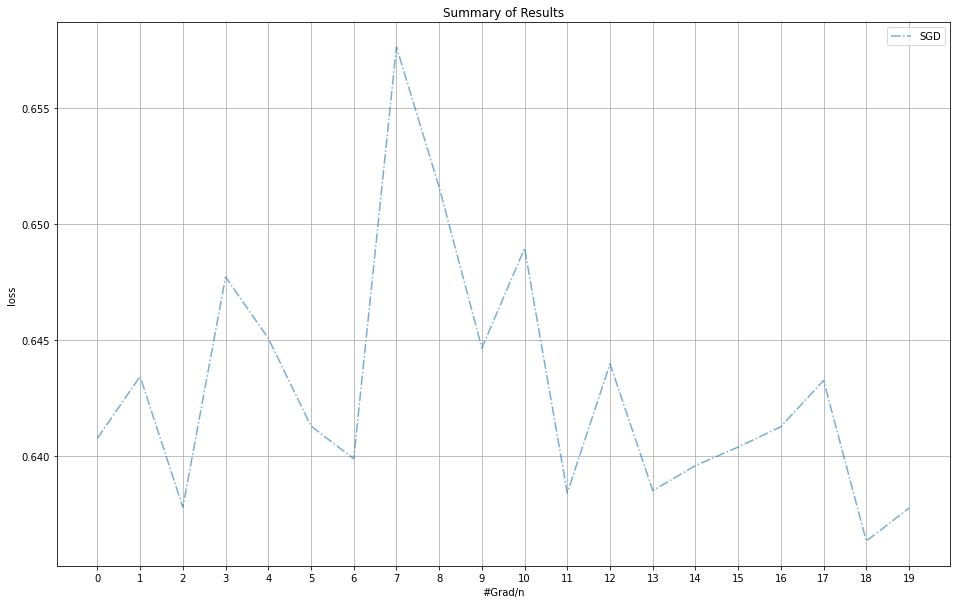

In [276]:
record_graph([record_SGD_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [277]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 3.12 seconds, Loss: 0.81, Test Accuracy: 0.689
# Grad/N 2: 5.64 seconds, Loss: 0.75, Test Accuracy: 0.696
# Grad/N 3: 7.82 seconds, Loss: 0.73, Test Accuracy: 0.702
# Grad/N 4: 10.02 seconds, Loss: 0.71, Test Accuracy: 0.707
# Grad/N 5: 12.33 seconds, Loss: 0.70, Test Accuracy: 0.710
# Grad/N 6: 14.52 seconds, Loss: 0.69, Test Accuracy: 0.712
# Grad/N 7: 17.10 seconds, Loss: 0.69, Test Accuracy: 0.714
# Grad/N 8: 19.53 seconds, Loss: 0.69, Test Accuracy: 0.714
# Grad/N 9: 21.87 seconds, Loss: 0.68, Test Accuracy: 0.716
# Grad/N 10: 24.43 seconds, Loss: 0.68, Test Accuracy: 0.716
# Grad/N 11: 26.80 seconds, Loss: 0.68, Test Accuracy: 0.717
# Grad/N 12: 29.07 seconds, Loss: 0.67, Test Accuracy: 0.717
# Grad/N 13: 31.54 seconds, Loss: 0.67, Test Accuracy: 0.717
# Grad/N 14: 33.87 seconds, Loss: 0.67, Test Accuracy: 0.718
# Grad/N 15: 36.78 seconds, Loss: 0.67, Test Accuracy: 0.718
# Grad/N 16: 39.09 seconds, Loss: 0.67, Test Accuracy: 0.718
# Grad/N 17: 41.20 seconds, Loss: 0.

In [278]:
# SAG


In [279]:
# SVRG


In [280]:
# SAGA


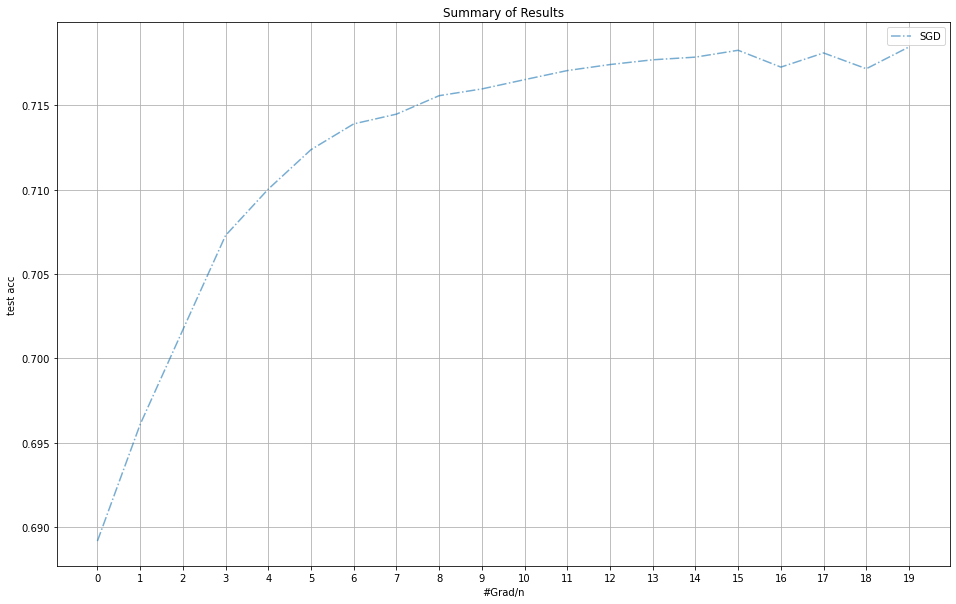

In [281]:
record_graph([record_SGD],'test_acc_#Grad/n')

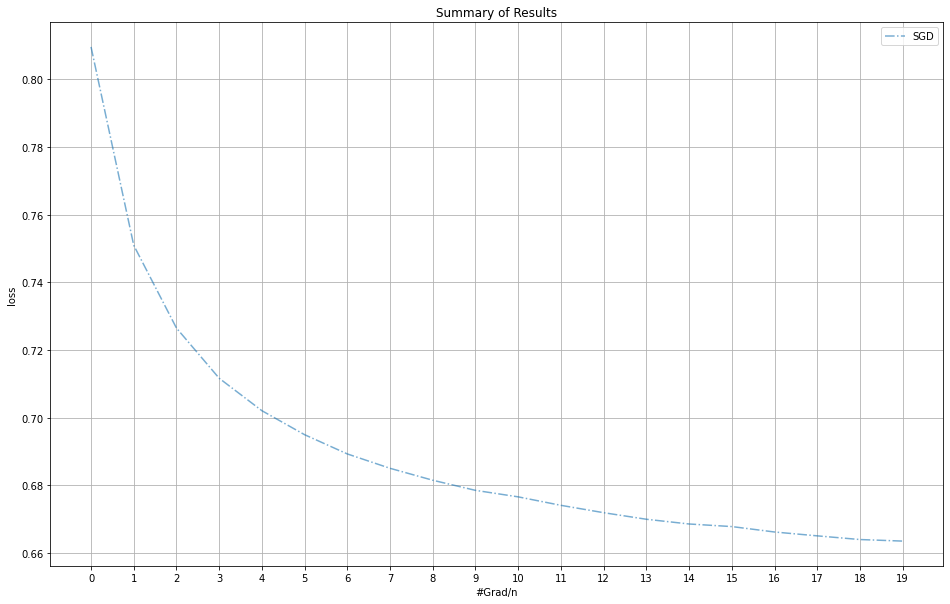

In [282]:
record_graph([record_SGD],'loss_#Grad/n')

## Experiment with IJCNN

In [36]:
ijcnn_train_data.shape

(35000, 22)

In [37]:
train_data, test_data, train_label, test_label = ijcnn_train_data, ijcnn_test_data, ijcnn_train_label, ijcnn_test_label

In [38]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([31585,  3415]))
(array([0, 1]), array([82989,  8712]))
(35000, 22)
(91701, 22)


In [39]:
n_features = 22
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [40]:
beta_init.shape

(2, 22)

### Single Version (Train Loss)

In [41]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 0.56 seconds, Loss: 0.25
# Grad/N 2: 0.97 seconds, Loss: 0.23
# Grad/N 3: 1.38 seconds, Loss: 0.21
# Grad/N 4: 1.79 seconds, Loss: 0.21
# Grad/N 5: 2.20 seconds, Loss: 0.20
# Grad/N 6: 2.60 seconds, Loss: 0.20
# Grad/N 7: 3.01 seconds, Loss: 0.20
# Grad/N 8: 3.42 seconds, Loss: 0.20
# Grad/N 9: 3.83 seconds, Loss: 0.20
# Grad/N 10: 4.24 seconds, Loss: 0.20
# Grad/N 11: 4.65 seconds, Loss: 0.20
# Grad/N 12: 5.06 seconds, Loss: 0.20
# Grad/N 13: 5.47 seconds, Loss: 0.20
# Grad/N 14: 5.89 seconds, Loss: 0.20
# Grad/N 15: 6.31 seconds, Loss: 0.20
# Grad/N 16: 6.72 seconds, Loss: 0.20
# Grad/N 17: 7.14 seconds, Loss: 0.20
# Grad/N 18: 7.55 seconds, Loss: 0.20
# Grad/N 19: 7.98 seconds, Loss: 0.20
# Grad/N 20: 8.40 seconds, Loss: 0.20


In [42]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.08 seconds, Loss: 0.25
# Grad/N 2: 2.14 seconds, Loss: 0.22
# Grad/N 3: 3.20 seconds, Loss: 0.21
# Grad/N 4: 4.27 seconds, Loss: 0.20
# Grad/N 5: 5.33 seconds, Loss: 0.20
# Grad/N 6: 6.39 seconds, Loss: 0.20
# Grad/N 7: 7.46 seconds, Loss: 0.20
# Grad/N 8: 8.53 seconds, Loss: 0.20
# Grad/N 9: 9.60 seconds, Loss: 0.20
# Grad/N 10: 10.67 seconds, Loss: 0.20
# Grad/N 11: 11.74 seconds, Loss: 0.20
# Grad/N 12: 12.83 seconds, Loss: 0.20
# Grad/N 13: 13.92 seconds, Loss: 0.20
# Grad/N 14: 15.00 seconds, Loss: 0.20
# Grad/N 15: 16.10 seconds, Loss: 0.20
# Grad/N 16: 17.18 seconds, Loss: 0.20
# Grad/N 17: 18.26 seconds, Loss: 0.20
# Grad/N 18: 19.35 seconds, Loss: 0.20
# Grad/N 19: 20.43 seconds, Loss: 0.20
# Grad/N 20: 21.52 seconds, Loss: 0.20


In [207]:
# SVRG


In [208]:
# SAGA


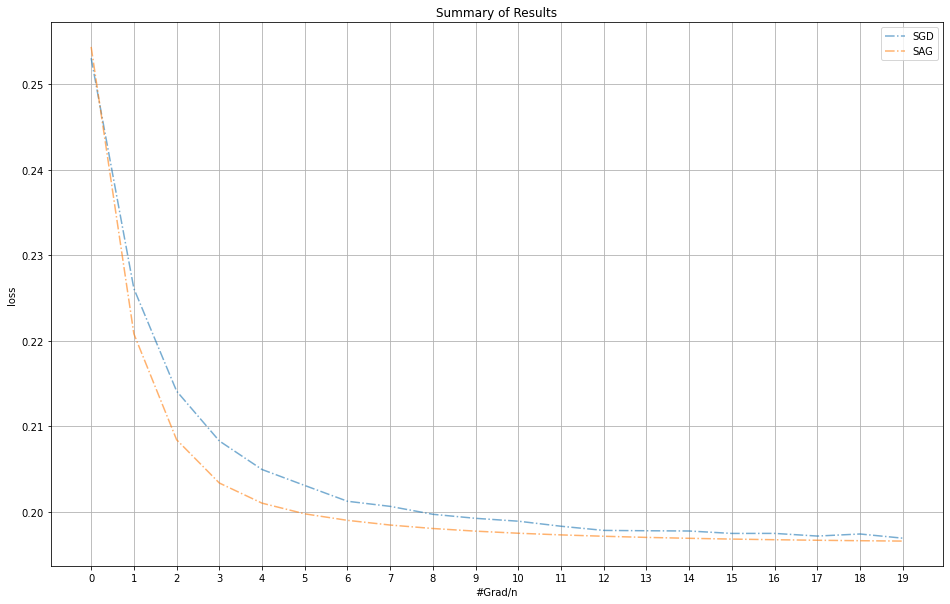

In [43]:
record_graph([record_SGD_single, record_SAG_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [44]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.69 seconds, Loss: 0.63, Test Accuracy: 0.841
# Grad/N 2: 1.12 seconds, Loss: 0.62, Test Accuracy: 0.848
# Grad/N 3: 1.54 seconds, Loss: 0.62, Test Accuracy: 0.850
# Grad/N 4: 1.97 seconds, Loss: 0.63, Test Accuracy: 0.850
# Grad/N 5: 2.39 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 6: 2.82 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 7: 3.23 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 8: 3.65 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 9: 4.07 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 10: 4.49 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 11: 4.91 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 12: 5.34 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 13: 5.76 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 14: 6.18 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 15: 6.61 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 16: 7.03 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 17: 7.46 seconds, Loss: 0.64, Test Accur

In [45]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.44 seconds, Loss: 0.63, Test Accuracy: 0.844
# Grad/N 2: 0.87 seconds, Loss: 0.63, Test Accuracy: 0.850
# Grad/N 3: 1.30 seconds, Loss: 0.63, Test Accuracy: 0.851
# Grad/N 4: 1.74 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 5: 2.17 seconds, Loss: 0.64, Test Accuracy: 0.852
# Grad/N 6: 2.61 seconds, Loss: 0.64, Test Accuracy: 0.852
# Grad/N 7: 3.04 seconds, Loss: 0.64, Test Accuracy: 0.852
# Grad/N 8: 3.47 seconds, Loss: 0.64, Test Accuracy: 0.852
# Grad/N 9: 3.91 seconds, Loss: 0.64, Test Accuracy: 0.852
# Grad/N 10: 4.34 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 11: 4.77 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 12: 5.21 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 13: 5.64 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 14: 6.08 seconds, Loss: 0.64, Test Accuracy: 0.851
# Grad/N 15: 6.51 seconds, Loss: 0.65, Test Accuracy: 0.851
# Grad/N 16: 6.94 seconds, Loss: 0.65, Test Accuracy: 0.851
# Grad/N 17: 7.38 seconds, Loss: 0.65, Test Accur

In [241]:
# SVRG


In [242]:
# SAGA


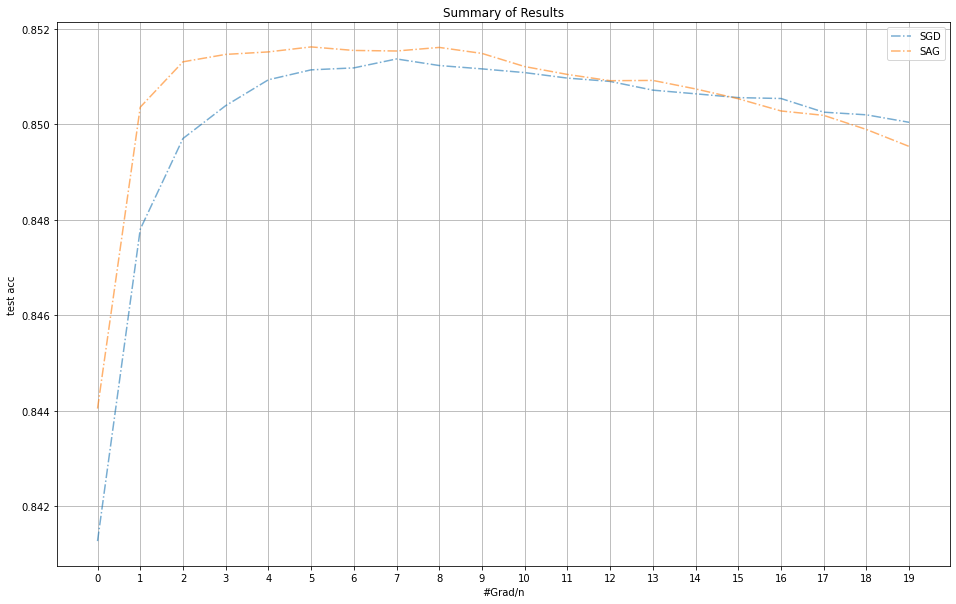

In [46]:
record_graph([record_SGD, record_SAG],'test_acc_#Grad/n')

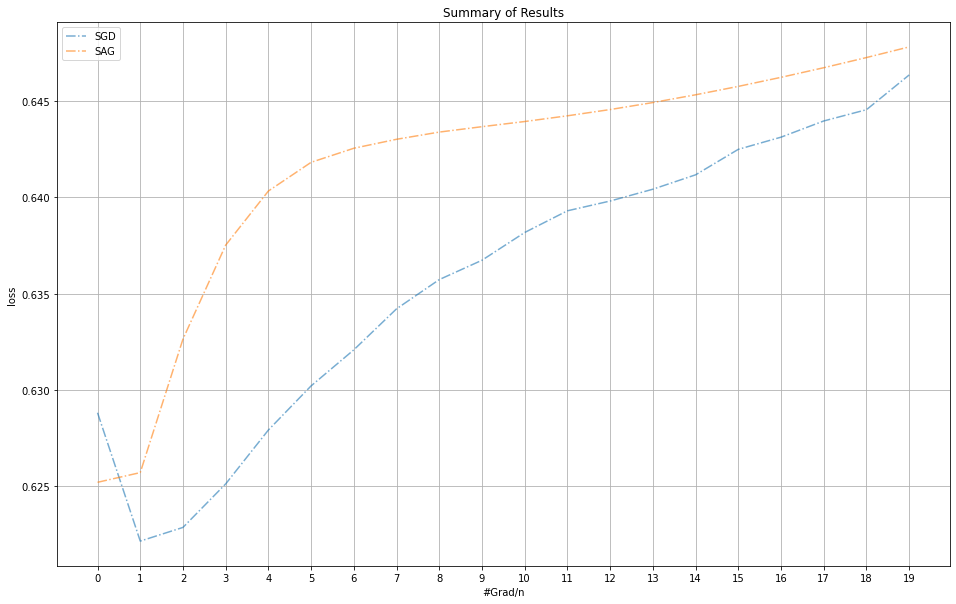

In [47]:
record_graph([record_SGD, record_SAG],'loss_#Grad/n')

## Experiment with MNIST

In [48]:
mnist_train_images.shape

(60000, 28, 28)

In [49]:
train_data, test_data, train_label, test_label = mnist_train_images.reshape(-1,28*28), mnist_test_images.reshape(-1,28*28), mnist_train_labels, mnist_test_labels

In [50]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(60000, 784)
(10000, 784)


In [51]:
n_features = 28*28
n_classes = 10
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [52]:
beta_init.shape

(10, 784)

### Single Version (Grad Var and Train Loss)

In [53]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.001, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.09 seconds, Loss: 0.39
# Grad/N 2: 2.05 seconds, Loss: 0.34
# Grad/N 3: 3.01 seconds, Loss: 0.33
# Grad/N 4: 3.97 seconds, Loss: 0.32
# Grad/N 5: 4.94 seconds, Loss: 0.31
# Grad/N 6: 5.89 seconds, Loss: 0.30
# Grad/N 7: 6.86 seconds, Loss: 0.30
# Grad/N 8: 7.82 seconds, Loss: 0.30
# Grad/N 9: 8.77 seconds, Loss: 0.29
# Grad/N 10: 9.73 seconds, Loss: 0.29
# Grad/N 11: 10.68 seconds, Loss: 0.29
# Grad/N 12: 11.65 seconds, Loss: 0.29
# Grad/N 13: 12.61 seconds, Loss: 0.28
# Grad/N 14: 13.58 seconds, Loss: 0.28
# Grad/N 15: 14.54 seconds, Loss: 0.28
# Grad/N 16: 15.51 seconds, Loss: 0.28
# Grad/N 17: 16.48 seconds, Loss: 0.28
# Grad/N 18: 17.46 seconds, Loss: 0.28
# Grad/N 19: 18.43 seconds, Loss: 0.28
# Grad/N 20: 19.39 seconds, Loss: 0.27


In [54]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.001, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 5.41 seconds, Loss: 0.38
# Grad/N 2: 8.78 seconds, Loss: 0.34
# Grad/N 3: 11.96 seconds, Loss: 0.32
# Grad/N 4: 15.09 seconds, Loss: 0.31
# Grad/N 5: 18.17 seconds, Loss: 0.30
# Grad/N 6: 21.26 seconds, Loss: 0.30
# Grad/N 7: 24.34 seconds, Loss: 0.29
# Grad/N 8: 27.41 seconds, Loss: 0.29
# Grad/N 9: 30.51 seconds, Loss: 0.29
# Grad/N 10: 33.61 seconds, Loss: 0.28
# Grad/N 11: 36.71 seconds, Loss: 0.28
# Grad/N 12: 39.83 seconds, Loss: 0.28
# Grad/N 13: 42.93 seconds, Loss: 0.28
# Grad/N 14: 46.04 seconds, Loss: 0.28
# Grad/N 15: 49.16 seconds, Loss: 0.28
# Grad/N 16: 52.24 seconds, Loss: 0.28
# Grad/N 17: 55.33 seconds, Loss: 0.27
# Grad/N 18: 58.42 seconds, Loss: 0.27
# Grad/N 19: 61.51 seconds, Loss: 0.27
# Grad/N 20: 64.66 seconds, Loss: 0.27


In [207]:
# SVRG


In [208]:
# SAGA


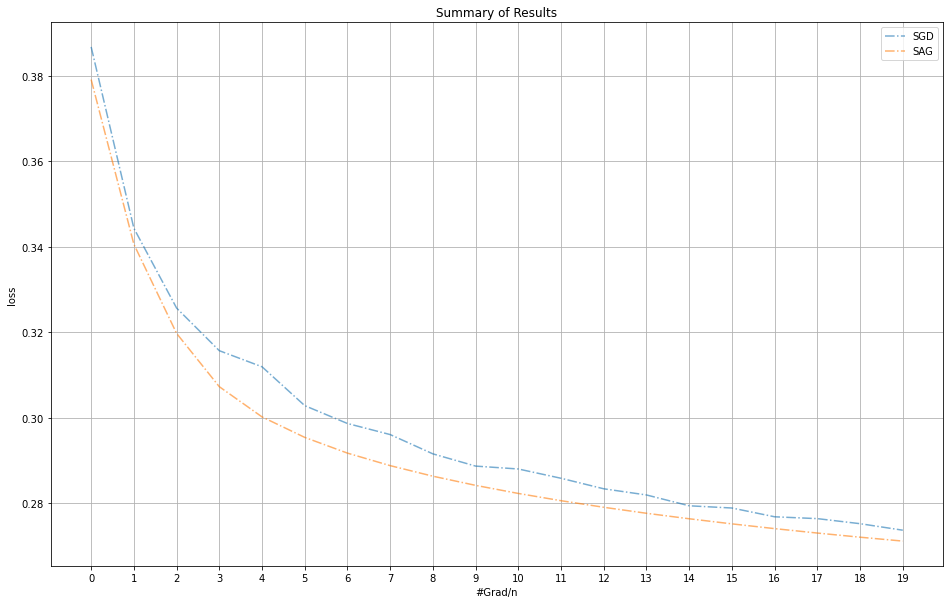

In [55]:
record_graph([record_SGD_single, record_SAG_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [56]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.41 seconds, Loss: 0.83, Test Accuracy: 0.789
# Grad/N 2: 0.64 seconds, Loss: 0.67, Test Accuracy: 0.815
# Grad/N 3: 0.87 seconds, Loss: 0.61, Test Accuracy: 0.828
# Grad/N 4: 1.08 seconds, Loss: 0.58, Test Accuracy: 0.832
# Grad/N 5: 1.30 seconds, Loss: 0.56, Test Accuracy: 0.835
# Grad/N 6: 1.51 seconds, Loss: 0.54, Test Accuracy: 0.839
# Grad/N 7: 1.73 seconds, Loss: 0.54, Test Accuracy: 0.840
# Grad/N 8: 1.94 seconds, Loss: 0.53, Test Accuracy: 0.842
# Grad/N 9: 2.17 seconds, Loss: 0.53, Test Accuracy: 0.843
# Grad/N 10: 2.38 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 11: 2.60 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 12: 2.81 seconds, Loss: 0.52, Test Accuracy: 0.843
# Grad/N 13: 3.02 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 14: 3.23 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 15: 3.45 seconds, Loss: 0.53, Test Accuracy: 0.843
# Grad/N 16: 3.66 seconds, Loss: 0.53, Test Accuracy: 0.843
# Grad/N 17: 3.87 seconds, Loss: 0.53, Test Accur

In [57]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.24 seconds, Loss: 0.72, Test Accuracy: 0.781
# Grad/N 2: 0.48 seconds, Loss: 0.62, Test Accuracy: 0.806
# Grad/N 3: 0.71 seconds, Loss: 0.57, Test Accuracy: 0.827
# Grad/N 4: 0.94 seconds, Loss: 0.54, Test Accuracy: 0.833
# Grad/N 5: 1.17 seconds, Loss: 0.53, Test Accuracy: 0.837
# Grad/N 6: 1.41 seconds, Loss: 0.52, Test Accuracy: 0.842
# Grad/N 7: 1.63 seconds, Loss: 0.52, Test Accuracy: 0.842
# Grad/N 8: 1.86 seconds, Loss: 0.52, Test Accuracy: 0.843
# Grad/N 9: 2.09 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 10: 2.32 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 11: 2.55 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 12: 2.78 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 13: 3.01 seconds, Loss: 0.52, Test Accuracy: 0.844
# Grad/N 14: 3.24 seconds, Loss: 0.53, Test Accuracy: 0.844
# Grad/N 15: 3.48 seconds, Loss: 0.53, Test Accuracy: 0.844
# Grad/N 16: 3.71 seconds, Loss: 0.53, Test Accuracy: 0.845
# Grad/N 17: 3.94 seconds, Loss: 0.53, Test Accur

In [254]:
# SVRG


In [255]:
# SAGA


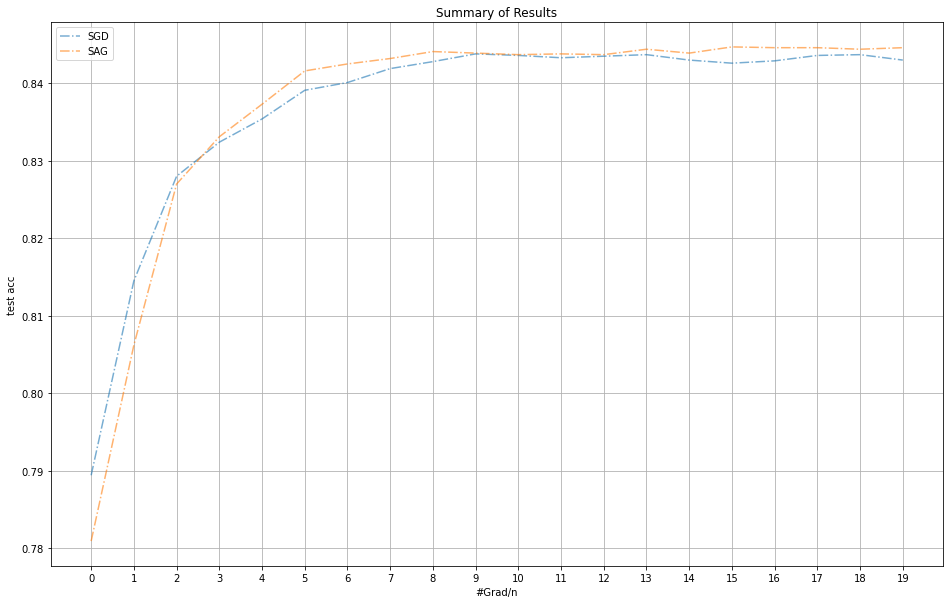

In [58]:
record_graph([record_SGD, record_SAG],'test_acc_#Grad/n')

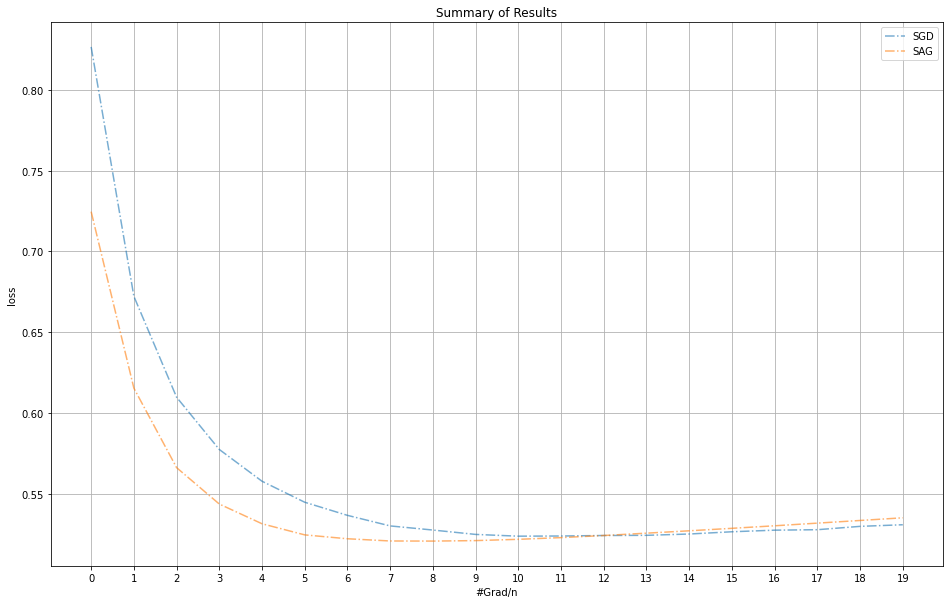

In [59]:
record_graph([record_SGD,record_SAG],'loss_#Grad/n')

## Experiment with Adult

In [60]:
adult_feature_train_norm.shape

(32561, 108)

In [61]:
n_features = 108
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,(1/(n_features*n_classes)), size=[n_classes, n_features])

In [62]:
beta_init.shape

(2, 108)

In [63]:
train_data, test_data, train_label, test_label = adult_feature_train_norm, adult_feature_test_norm, adult_label_train_bi, adult_label_test_bi

In [64]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([24720,  7841]))
(array([0, 1]), array([12435,  3846]))
(32561, 108)
(16281, 108)


### Single Version (Grad Var and Train Loss)

In [65]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 0.53 seconds, Loss: 0.33
# Grad/N 2: 0.91 seconds, Loss: 0.33
# Grad/N 3: 1.29 seconds, Loss: 0.32
# Grad/N 4: 1.68 seconds, Loss: 0.32
# Grad/N 5: 2.07 seconds, Loss: 0.32
# Grad/N 6: 2.46 seconds, Loss: 0.32
# Grad/N 7: 2.84 seconds, Loss: 0.32
# Grad/N 8: 3.23 seconds, Loss: 0.32
# Grad/N 9: 3.61 seconds, Loss: 0.33
# Grad/N 10: 4.00 seconds, Loss: 0.32
# Grad/N 11: 4.39 seconds, Loss: 0.32
# Grad/N 12: 4.78 seconds, Loss: 0.33
# Grad/N 13: 5.17 seconds, Loss: 0.32
# Grad/N 14: 5.57 seconds, Loss: 0.33
# Grad/N 15: 5.97 seconds, Loss: 0.32
# Grad/N 16: 6.37 seconds, Loss: 0.33
# Grad/N 17: 6.76 seconds, Loss: 0.32
# Grad/N 18: 7.16 seconds, Loss: 0.32
# Grad/N 19: 7.56 seconds, Loss: 0.32
# Grad/N 20: 7.96 seconds, Loss: 0.32


In [66]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.04 seconds, Loss: 0.33
# Grad/N 2: 2.03 seconds, Loss: 0.32
# Grad/N 3: 3.02 seconds, Loss: 0.32
# Grad/N 4: 4.02 seconds, Loss: 0.32
# Grad/N 5: 5.01 seconds, Loss: 0.32
# Grad/N 6: 6.00 seconds, Loss: 0.32
# Grad/N 7: 6.99 seconds, Loss: 0.32
# Grad/N 8: 7.98 seconds, Loss: 0.32
# Grad/N 9: 8.97 seconds, Loss: 0.32
# Grad/N 10: 9.97 seconds, Loss: 0.32
# Grad/N 11: 10.97 seconds, Loss: 0.32
# Grad/N 12: 11.97 seconds, Loss: 0.32
# Grad/N 13: 12.98 seconds, Loss: 0.32
# Grad/N 14: 13.98 seconds, Loss: 0.32
# Grad/N 15: 15.00 seconds, Loss: 0.32
# Grad/N 16: 16.00 seconds, Loss: 0.32
# Grad/N 17: 17.01 seconds, Loss: 0.32
# Grad/N 18: 18.02 seconds, Loss: 0.32
# Grad/N 19: 19.03 seconds, Loss: 0.32
# Grad/N 20: 20.03 seconds, Loss: 0.32


In [67]:
# SVRG


In [68]:
# SAGA


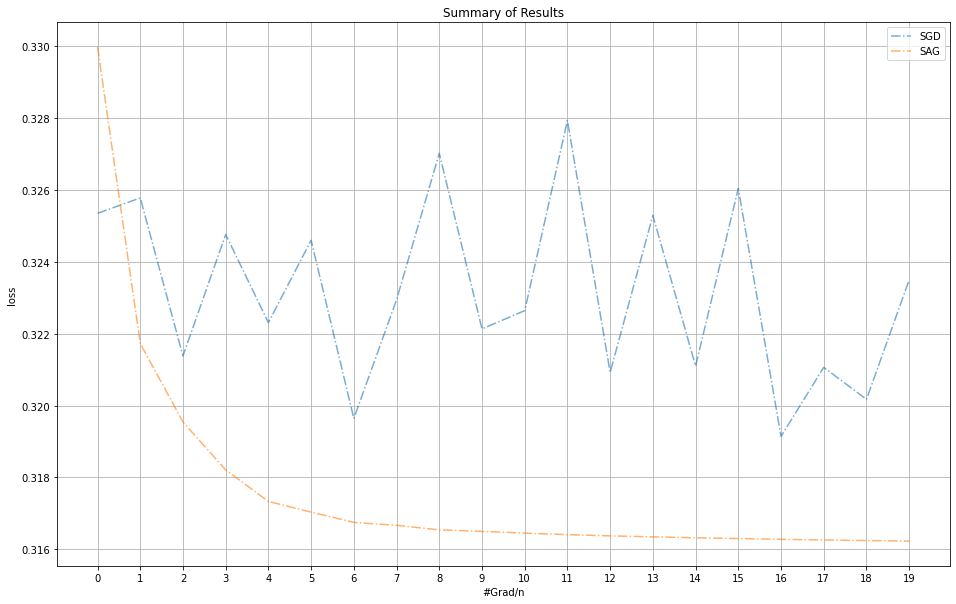

In [67]:
record_graph([record_SGD_single, record_SAG_single],'loss_#Grad/n')

### Minibatch Version (Test Acc)

In [68]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.32 seconds, Loss: 0.41, Test Accuracy: 0.711
# Grad/N 2: 0.41 seconds, Loss: 0.38, Test Accuracy: 0.696
# Grad/N 3: 0.51 seconds, Loss: 0.37, Test Accuracy: 0.690
# Grad/N 4: 0.60 seconds, Loss: 0.36, Test Accuracy: 0.685
# Grad/N 5: 0.70 seconds, Loss: 0.36, Test Accuracy: 0.682
# Grad/N 6: 0.80 seconds, Loss: 0.36, Test Accuracy: 0.682
# Grad/N 7: 0.89 seconds, Loss: 0.36, Test Accuracy: 0.680
# Grad/N 8: 0.99 seconds, Loss: 0.35, Test Accuracy: 0.679
# Grad/N 9: 1.08 seconds, Loss: 0.35, Test Accuracy: 0.679
# Grad/N 10: 1.18 seconds, Loss: 0.35, Test Accuracy: 0.678
# Grad/N 11: 1.27 seconds, Loss: 0.35, Test Accuracy: 0.679
# Grad/N 12: 1.37 seconds, Loss: 0.35, Test Accuracy: 0.676
# Grad/N 13: 1.47 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 14: 1.56 seconds, Loss: 0.35, Test Accuracy: 0.676
# Grad/N 15: 1.66 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 16: 1.75 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 17: 1.85 seconds, Loss: 0.35, Test Accur

In [69]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.10 seconds, Loss: 0.39, Test Accuracy: 0.709
# Grad/N 2: 0.20 seconds, Loss: 0.37, Test Accuracy: 0.668
# Grad/N 3: 0.30 seconds, Loss: 0.37, Test Accuracy: 0.678
# Grad/N 4: 0.40 seconds, Loss: 0.36, Test Accuracy: 0.683
# Grad/N 5: 0.50 seconds, Loss: 0.36, Test Accuracy: 0.677
# Grad/N 6: 0.60 seconds, Loss: 0.36, Test Accuracy: 0.676
# Grad/N 7: 0.70 seconds, Loss: 0.35, Test Accuracy: 0.680
# Grad/N 8: 0.80 seconds, Loss: 0.35, Test Accuracy: 0.679
# Grad/N 9: 0.90 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 10: 1.00 seconds, Loss: 0.35, Test Accuracy: 0.678
# Grad/N 11: 1.10 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 12: 1.20 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 13: 1.30 seconds, Loss: 0.35, Test Accuracy: 0.677
# Grad/N 14: 1.40 seconds, Loss: 0.35, Test Accuracy: 0.676
# Grad/N 15: 1.50 seconds, Loss: 0.35, Test Accuracy: 0.676
# Grad/N 16: 1.60 seconds, Loss: 0.35, Test Accuracy: 0.676
# Grad/N 17: 1.69 seconds, Loss: 0.35, Test Accur

In [224]:
# SVRG


In [225]:
# SAGA


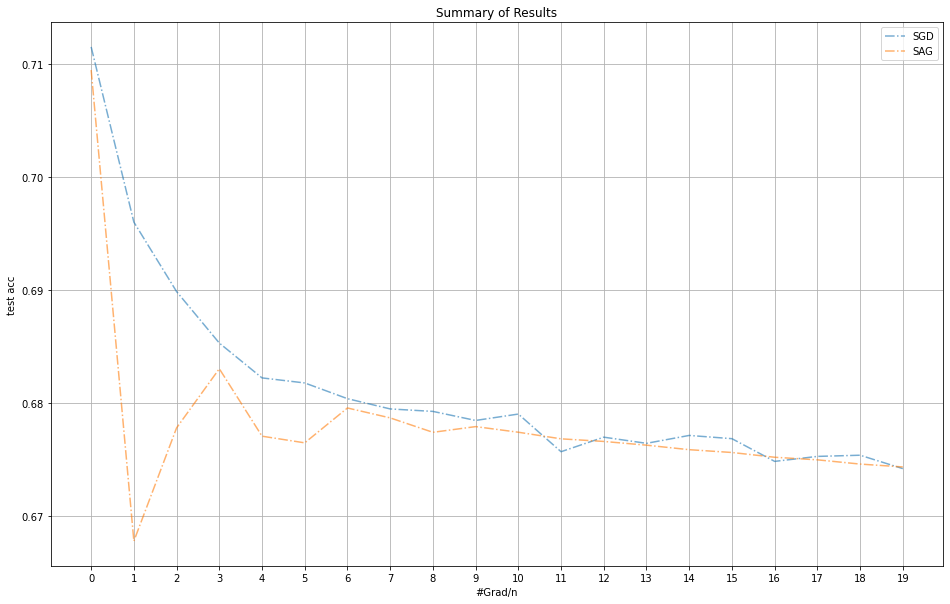

In [70]:
record_graph([record_SGD, record_SAG],key='test_acc_#Grad/n')

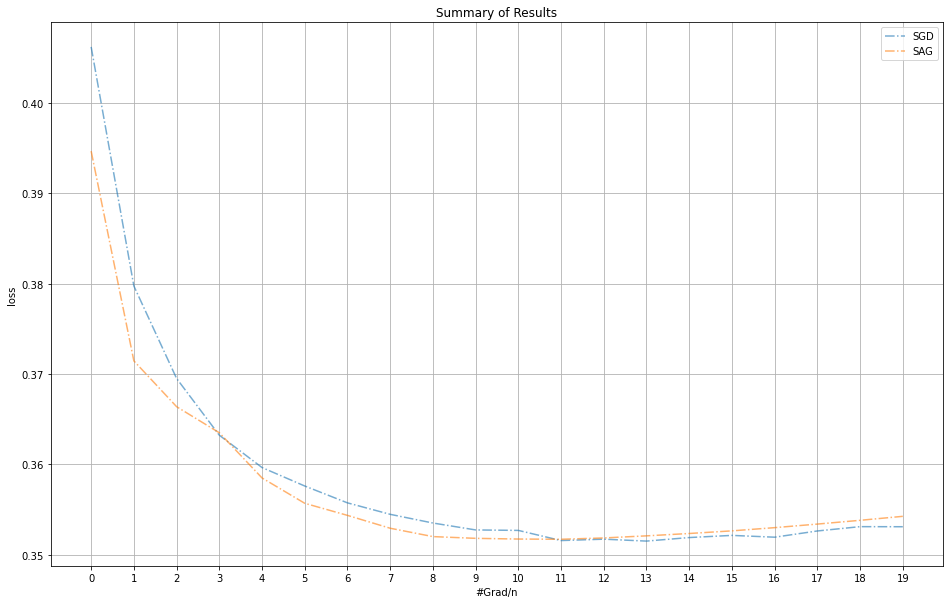

In [71]:
record_graph([record_SGD, record_SAG],key='loss_#Grad/n')